NLP

In [ ]:
pip install pypdf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y numba

Found existing installation: numba 0.58.1
Uninstalling numba-0.58.1:
  Successfully uninstalled numba-0.58.1


In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using c

In [ ]:
!pip install numba==0.56.4

In [ ]:
!pip install pypdf pandas matplotlib seaborn nltk sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Import Libraies

In [ ]:
import os
import csv
import re
from pypdf import PdfReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import ne_chunk
from collections import Counter
from wordcloud import WordCloud
from gensim import corpora, models
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

#  NLTK data packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [15]:
# File paths
input_file = '/content/preprocessed_data.csv'
output_file = '/content/sentiment_frequencies.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Function to determine sentiment
def get_sentiment(text):
    if not isinstance(text, str):
        return 'Neutral'
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Ensure the 'august' column values are strings
df['august'] = df['august'].astype(str)

# Apply sentiment analysis to the 'august' column
df['Sentiment'] = df['august'].apply(get_sentiment)

# Calculate sentiment frequencies
sentiment_counts = df['Sentiment'].value_counts()

# Write sentiment frequencies to a new CSV file
sentiment_counts.to_csv(output_file, header=['Frequency'])

Index(['Sentiment', 'Frequency'], dtype='object')


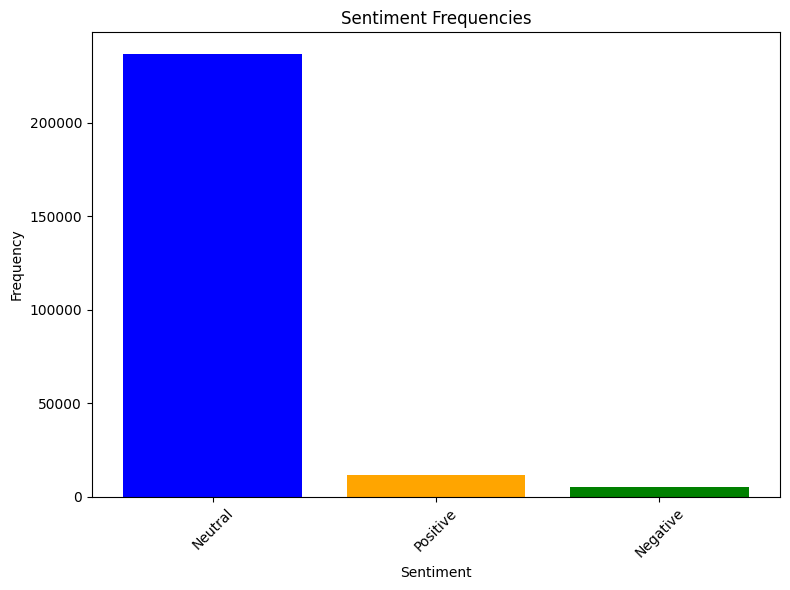

In [17]:
input_file = '/content/sentiment_frequencies.csv'

# Read the sentiment frequencies CSV file
sentiment_counts = pd.read_csv(input_file)

# Check the columns to confirm their names
print(sentiment_counts.columns)


# Plot the sentiment frequencies
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.iloc[:, 0], sentiment_counts.iloc[:, 1], color=['blue', 'orange', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('/content/sentiment_frequencies_plot.png')

# Display the plot
plt.show()

Topic modeling with Latent Dirichlet Allocation

In [24]:
import gensim
from gensim import corpora
input_file = '/content/preprocessed_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)
df['august'] = df['august'].astype(str)
df['processed'] = df['august'].apply(lambda x: x.split())


#  dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['processed'])
corpus = [dictionary.doc2bow(text) for text in df['processed']]

# Perform LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=12)
for topic in topics:
    print(topic)


(0, '0.114*"conflict" + 0.109*"also" + 0.082*"regions" + 0.081*"cases" + 0.038*"civilians" + 0.034*"enforcement" + 0.032*"population" + 0.032*"general" + 0.031*"work" + 0.030*"could" + 0.022*"government" + 0.020*"total"')
(1, '0.063*"people" + 0.058*"including" + 0.056*"services" + 0.056*"reported" + 0.048*"criminal" + 0.040*"crimes" + 0.036*"situation" + 0.033*"assistance" + 0.030*"communities" + 0.029*"report" + 0.027*"crsv" + 0.027*"however"')
(2, '0.147*"armed" + 0.054*"areas" + 0.053*"number" + 0.047*"public" + 0.041*"may" + 0.037*"police" + 0.034*"federation" + 0.032*"place" + 0.030*"representatives" + 0.030*"members" + 0.024*"legal" + 0.017*"system"')
(3, '0.114*"law" + 0.055*"war" + 0.049*"humanitarian" + 0.046*"well" + 0.045*"rape" + 0.038*"lack" + 0.028*"documented" + 0.027*"result" + 0.026*"court" + 0.021*"years" + 0.020*"treatment" + 0.015*"monitoring"')
(4, '0.184*"women" + 0.110*"ukraine" + 0.080*"forces" + 0.060*"international" + 0.050*"military" + 0.035*"time" + 0.029*"

In [7]:
# Frequency distribution analysis
all_tokens = [token for doc in data["preprocessed_text"] for token in doc]
freq_dist = FreqDist(all_tokens)
print("Most common tokens:", freq_dist.most_common(20))



Most common tokens: [('violence', 3464), ('woman', 3437), ('ukraine', 2062), ('sexual', 1779), ('gender', 1741), ('de', 1617), ('right', 1516), ('victim', 1218), ('law', 1162), ('survivor', 1138), ('human', 1002), ('international', 949), ('support', 946), ('conflict', 933), ('service', 918), ('also', 911), ('case', 849), ('national', 829), ('may', 815), ('russian', 813)]


word clouds

In [23]:
pip install wordcloud matplotlib


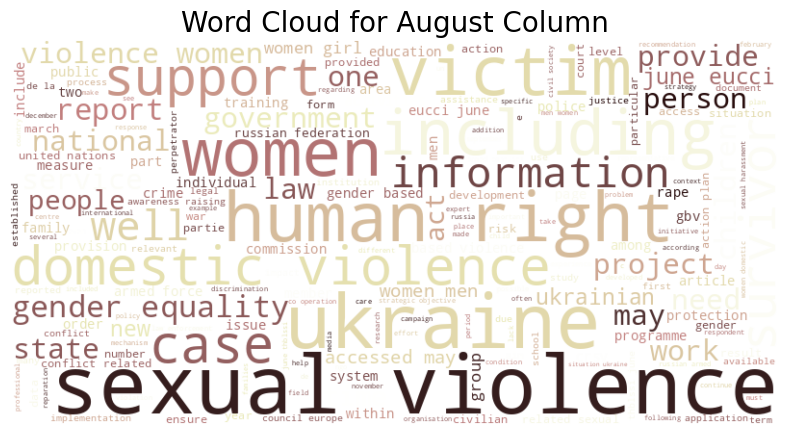

In [25]:
input_file = '/content/preprocessed_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)
df = df.astype(str)

text = ' '.join(df['august'].astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='pink').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for August Column', fontsize=20)
plt.show()


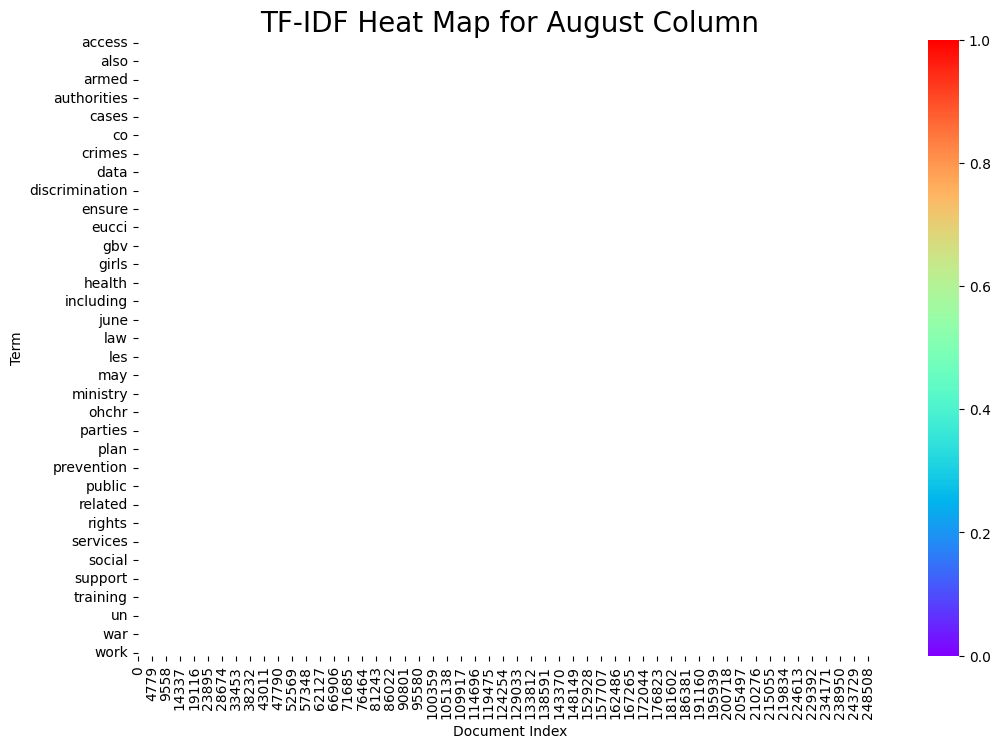

In [26]:
# File paths
input_file = '/content/preprocessed_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Transform all data to strings
df = df.astype(str)

# Assuming the preprocessed text is in the 'august' column
texts = df['august'].tolist()

# Create the TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 terms for simplicity
tfidf_matrix = vectorizer.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Generate the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.T, cmap='rainbow', cbar=True, linewidths=0.5)
plt.title('TF-IDF Heat Map for August Column', fontsize=20)
plt.xlabel('Document Index')
plt.ylabel('Term')
plt.show()